In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv('../Day1_DataWrangling/data/cleaned_googleplaystore.csv')

In [10]:
# 1. Separate the Target (what we want to predict) and Features (what we use to predict)
# We will try to predict the 'Rating'
y = df['Rating'] # This is our target variable

# For our first model, let's choose a few features that make sense.
# We drop the target and any other columns that are not useful (like 'Sr.')
X = df[['Reviews', 'Size', 'Installs', 'Price', 'Rating_normalized']].copy() # Start with numerical features

# 2. Handle Categorical Features (If you want to include them)
# Let's say we also want to use 'Category'. We need to convert it to numbers.
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for each categorical column
label_encoder = LabelEncoder()
# Create a new column 'Category_Encoded' with numerical labels
X['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

# Check out our feature set
print("Features we are using:")
print(X.head())
print("\nTarget variable (Rating):")
print(y.head())

Features we are using:
  Reviews  Size     Installs Price  Rating_normalized  Category_Encoded
0     159   19M      10,000+     0           0.172222                 1
1     967   14M     500,000+     0           0.161111                 1
2   87510  8.7M   5,000,000+     0           0.205556                 1
3  215644   25M  50,000,000+     0           0.194444                 1
4     967  2.8M     100,000+     0           0.183333                 1

Target variable (Rating):
0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64


In [17]:
# Check data types
print(X_train.dtypes)

# Convert object columns to numeric, handling errors
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle missing values created by conversion
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Reviews              float64
Size                 float64
Installs             float64
Price                float64
Rating_normalized    float64
Category_Encoded       int32
dtype: object


In [18]:
# 1. Create the model object
lr_model = LinearRegression()

# 2. Train the model on the training data
lr_model.fit(X_train, y_train)

# 3. Use the model to make predictions on the test data (data it hasn't seen)
lr_predictions = lr_model.predict(X_test)

# 4. Evaluate the model's performance
print("=== Linear Regression ===")
print('MAE:', mean_absolute_error(y_test, lr_predictions))
print('MSE:', mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_predictions)))
print('R2 Score:', r2_score(y_test, lr_predictions))

=== Linear Regression ===
MAE: 6.4780643192161375e-15
MSE: 5.527114343884207e-29
RMSE: 7.4344564992232e-15
R2 Score: 1.0


   Actual_Rating  Predicted_Rating
0            4.3               4.3
1            4.7               4.7
2            4.3               4.3
3            4.4               4.4
4            3.3               3.3
5            4.3               4.3
6            2.3               2.3
7            4.5               4.5
8            4.2               4.2
9            1.6               1.6


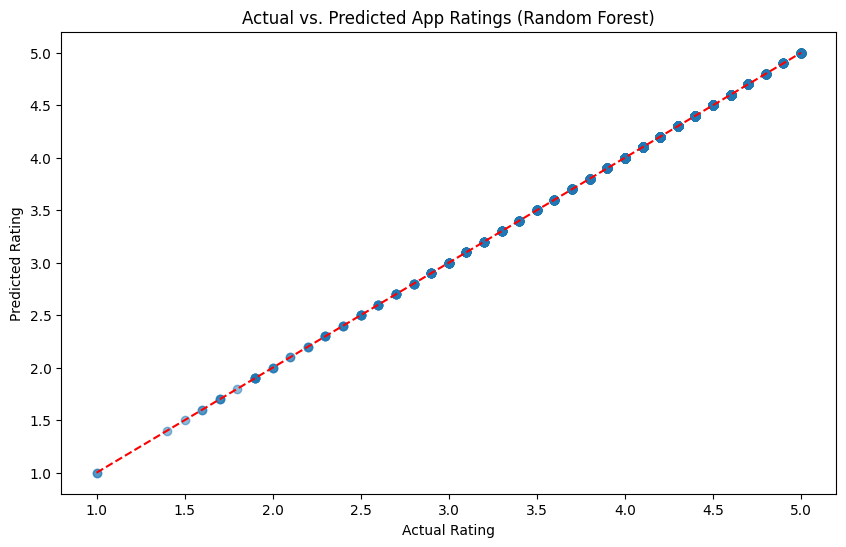

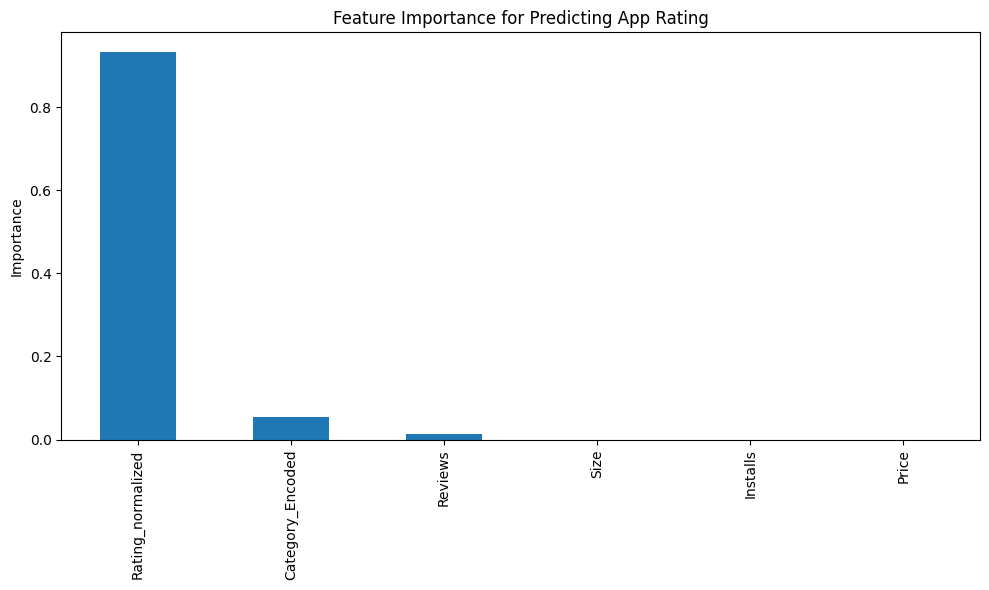

In [28]:
# Let's create a DataFrame to compare actual vs. predicted values for the Random Forest
results = pd.DataFrame({'Actual_Rating': y_test, 'Predicted_Rating': lr_predictions})
results = results.reset_index(drop=True) # Clean up the index
print(results.head(10))

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted App Ratings (Random Forest)')

# Plot a perfect prediction line for reference
max_val = max(y_test.max(), lr_predictions.max())
min_val = min(y_test.min(), lr_predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--') # Red dashed line
plt.show()

# Check which features were most important for the prediction
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Predicting App Rating')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [21]:
# Split the data into training and testing sets
# test_size=0.3 means 30% of data is used for testing, 70% for training
# random_state=42 ensures we get the same split every time (for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (7588, 6)
Testing set size: (3253, 6)
Reviews               object
Size                  object
Installs              object
Price                 object
Rating_normalized    float64
Category_Encoded       int32
dtype: object


In [24]:
# Check data types
print(X_train.dtypes)

# Convert object columns to numeric, handling errors
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Handle missing values created by conversion
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

Reviews              float64
Size                 float64
Installs             float64
Price                float64
Rating_normalized    float64
Category_Encoded       int32
dtype: object


In [25]:
# 1. Create the model object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators=100 trees

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
rf_predictions = rf_model.predict(X_test)

# 4. Evaluate
print("\n=== Random Forest Regressor ===")
print('MAE:', mean_absolute_error(y_test, rf_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_predictions)))
print('R2 Score:', r2_score(y_test, rf_predictions))


=== Random Forest Regressor ===
MAE: 2.7666769155852242e-05
RMSE: 0.0008069022867349612
R2 Score: 0.9999970799311656


   Actual_Rating  Predicted_Rating
0            4.3               4.3
1            4.7               4.7
2            4.3               4.3
3            4.4               4.4
4            3.3               3.3
5            4.3               4.3
6            2.3               2.3
7            4.5               4.5
8            4.2               4.2
9            1.6               1.6


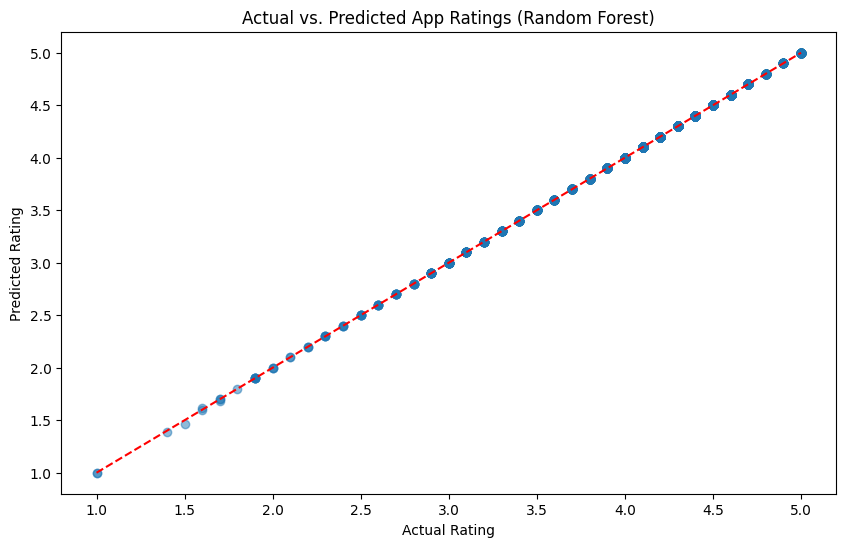

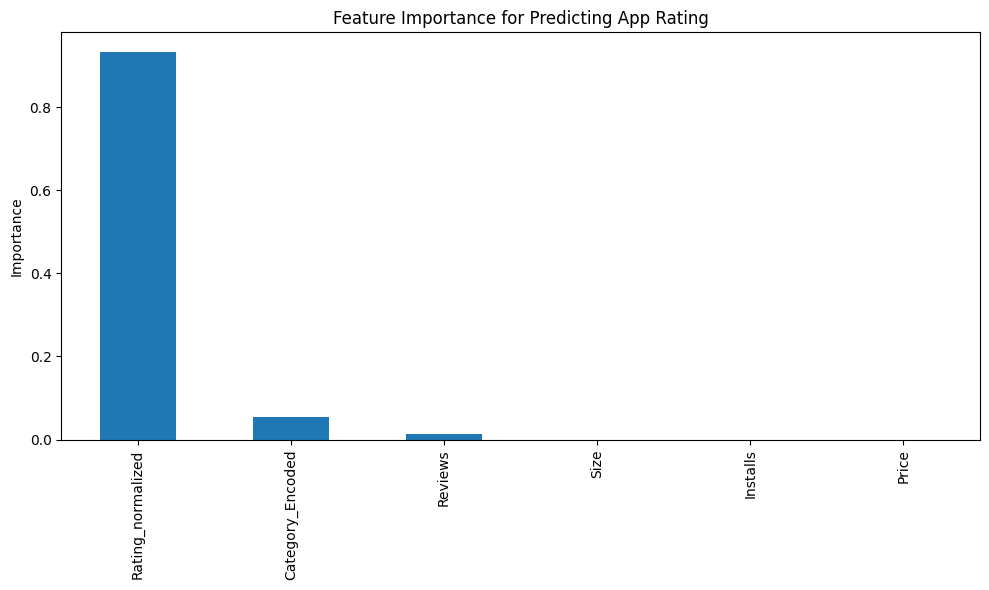

In [26]:
# Let's create a DataFrame to compare actual vs. predicted values for the Random Forest
results = pd.DataFrame({'Actual_Rating': y_test, 'Predicted_Rating': rf_predictions})
results = results.reset_index(drop=True) # Clean up the index
print(results.head(10))

# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted App Ratings (Random Forest)')

# Plot a perfect prediction line for reference
max_val = max(y_test.max(), rf_predictions.max())
min_val = min(y_test.min(), rf_predictions.min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--') # Red dashed line
plt.show()

# Check which features were most important for the prediction
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Predicting App Rating')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()